Librerías necesarias:

In [1]:
import requests
import json
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rasterio as rio
import shapefile
import geopandas as gpd
import os
import fiona

Crea copias del request total por covariables: se crea una lista con tantas peticiones como covariables

In [2]:
def copies(request):
    copies = []

    for i in range(len(request['covariables'])):
        copia = copy.deepcopy(request)
        copia['covariables'] = [copia['covariables'][i]]

        keys_to_remove = []
        for covariable in copia['covariable_filter']:
            if covariable != copia['covariables'][0]:
                keys_to_remove.append(covariable)

        for key in keys_to_remove:
            del copia['covariable_filter'][key]

        copies.append(copia)
    return copies

Request al servidor de epi species

In [3]:
solicitud = {"selected_decile":[10],"mesh":"mun","covariables":["inegi2020","snib","worldclim"],"covariable_filter":{"inegi2020":[{"taxon":"code","value":"P18YM_PB_M"},{"taxon":"code","value":"P18YM_PB"},{"taxon":"code","value":"P18YM_PB_F"},{"taxon":"code","value":"P15YM_AN"},{"taxon":"code","value":"GRAPROES_M"},{"taxon":"code","value":"VIVTOT"},{"taxon":"code","value":"P15YM_AN_F"},{"taxon":"code","value":"P3YM_HLI"},{"taxon":"code","value":"VIVPAR_HAB"},{"taxon":"code","value":"P3YM_HLI_F"},{"taxon":"code","value":"P3YM_HLI_M"},{"taxon":"code","value":"P3HLINHE"},{"taxon":"code","value":"P3HLINHE_F"},{"taxon":"code","value":"P3HLI_HE"},{"taxon":"code","value":"P3HLI_HE_F"},{"taxon":"code","value":"P3HLI_HE_M"},{"taxon":"code","value":"P5_HLI"},{"taxon":"code","value":"P5_HLI_NHE"},{"taxon":"code","value":"P5_HLI_HE"},{"taxon":"code","value":"PHOG_IND"},{"taxon":"code","value":"TVIVPARHAB"},{"taxon":"code","value":"P3HLINHE_M"},{"taxon":"code","value":"P15YM_AN_M"},{"taxon":"code","value":"TVIVPAR"},{"taxon":"code","value":"PCON_LIMI"},{"taxon":"code","value":"PCLIM_VIS"},{"taxon":"code","value":"PCLIM_OAUD"},{"taxon":"code","value":"PCLIM_MOT2"},{"taxon":"code","value":"P3A5_NOA"},{"taxon":"code","value":"TVIVHAB"},{"taxon":"code","value":"P8A14AN"},{"taxon":"code","value":"P8A14AN_F"},{"taxon":"code","value":"P8A14AN_M"},{"taxon":"code","value":"VPH_1DOR"},{"taxon":"code","value":"VIVPAR_DES"},{"taxon":"code","value":"OCUPVIVPAR"},{"taxon":"code","value":"PROM_OCUP"},{"taxon":"code","value":"P15YM_SE_M"},{"taxon":"code","value":"PRO_OCUP_C"},{"taxon":"code","value":"VPH_PISODT"},{"taxon":"code","value":"VPH_PISOTI"},{"taxon":"code","value":"VPH_2YMASD"},{"taxon":"code","value":"P15SEC_IN"},{"taxon":"code","value":"VPH_1CUART"},{"taxon":"code","value":"VPH_2CUART"},{"taxon":"code","value":"VPH_3YMASC"},{"taxon":"code","value":"VPH_C_ELEC"},{"taxon":"code","value":"VPH_S_ELEC"},{"taxon":"code","value":"VPH_AGUADV"},{"taxon":"code","value":"PEA"},{"taxon":"code","value":"VPH_AEASP"},{"taxon":"code","value":"VPH_AGUAFV"},{"taxon":"code","value":"VPH_TINACO"},{"taxon":"code","value":"VPH_CISTER"},{"taxon":"code","value":"VPH_EXCSA"},{"taxon":"code","value":"PE_INAC"},{"taxon":"code","value":"PE_INAC_F"},{"taxon":"code","value":"PE_INAC_M"},{"taxon":"code","value":"POTRAS_REL"},{"taxon":"code","value":"POBHOG"},{"taxon":"code","value":"POB_AFRO"},{"taxon":"code","value":"VPH_CVJ"},{"taxon":"code","value":"POB_AFRO_F"},{"taxon":"code","value":"POB_AFRO_M"},{"taxon":"code","value":"VPH_LETR"},{"taxon":"code","value":"P12YM_CASA"},{"taxon":"code","value":"P12YM_SEPA"},{"taxon":"code","value":"VPH_DRENAJ"},{"taxon":"code","value":"VPH_NODREN"},{"taxon":"code","value":"VPH_C_SERV"},{"taxon":"code","value":"VPH_NDEAED"},{"taxon":"code","value":"VPH_DSADMA"},{"taxon":"code","value":"VPH_NDACMM"},{"taxon":"code","value":"VPH_SNBIEN"},{"taxon":"code","value":"VPH_REFRI"},{"taxon":"code","value":"VPH_LAVAD"},{"taxon":"code","value":"VPH_HMICRO"},{"taxon":"code","value":"VPH_MOTO"},{"taxon":"code","value":"VPH_BICI"},{"taxon":"code","value":"VPH_RADIO"},{"taxon":"code","value":"VPH_TV"},{"taxon":"code","value":"VPH_PC"},{"taxon":"code","value":"P6A11_NOAM"},{"taxon":"code","value":"VPH_TELEF"},{"taxon":"code","value":"VPH_CEL"},{"taxon":"code","value":"VPH_INTER"},{"taxon":"code","value":"VPH_STVP"},{"taxon":"code","value":"VPH_SPMVPI"},{"taxon":"code","value":"VPH_SINRTV"},{"taxon":"code","value":"VPH_SINLTC"},{"taxon":"code","value":"VPH_SINCINT"},{"taxon":"code","value":"P12A14NOA"},{"taxon":"code","value":"P12A14NOAM"},{"taxon":"code","value":"P12YM_SOLT"},{"taxon":"code","value":"PNACENT"},{"taxon":"code","value":"P3A5_NOA_F"},{"taxon":"code","value":"P3A5_NOA_M"},{"taxon":"code","value":"P6A11_NOA"},{"taxon":"code","value":"P6A11_NOAF"},{"taxon":"code","value":"P12A14NOAF"},{"taxon":"code","value":"P15A17A_F"},{"taxon":"code","value":"P15A17A_M"},{"taxon":"code","value":"P18A24A"},{"taxon":"code","value":"P18A24A_F"},{"taxon":"code","value":"P18A24A_M"},{"taxon":"code","value":"P15A17A"},{"taxon":"code","value":"P15PRI_IN"},{"taxon":"code","value":"P15PRI_INF"},{"taxon":"code","value":"P15PRI_INM"},{"taxon":"code","value":"P15PRI_CO"},{"taxon":"code","value":"P15PRI_COF"},{"taxon":"code","value":"P15PRI_COM"},{"taxon":"code","value":"P15SEC_INF"},{"taxon":"code","value":"P15SEC_INM"},{"taxon":"code","value":"P15SEC_CO"},{"taxon":"code","value":"P15SEC_COF"},{"taxon":"code","value":"P15SEC_COM"},{"taxon":"code","value":"GRAPROES"},{"taxon":"code","value":"GRAPROES_F"},{"taxon":"code","value":"PDESOCUP"},{"taxon":"code","value":"POCUPADA"},{"taxon":"code","value":"POCUPADA_F"},{"taxon":"code","value":"POCUPADA_M"},{"taxon":"code","value":"PDESOCUP_F"},{"taxon":"code","value":"PDESOCUP_M"},{"taxon":"code","value":"PEA_F"},{"taxon":"code","value":"PEA_M"},{"taxon":"code","value":"PROM_HNV"},{"taxon":"code","value":"PNACENT_F"},{"taxon":"code","value":"PNACENT_M"},{"taxon":"code","value":"PNACOE"},{"taxon":"code","value":"PNACOE_F"},{"taxon":"code","value":"PNACOE_M"},{"taxon":"code","value":"PRES2015"},{"taxon":"code","value":"PRES2015_F"},{"taxon":"code","value":"PRES2015_M"},{"taxon":"code","value":"PRESOE15"},{"taxon":"code","value":"PRESOE15_F"},{"taxon":"code","value":"PRESOE15_M"},{"taxon":"code","value":"TOTHOG"},{"taxon":"code","value":"HOGJEF_F"},{"taxon":"code","value":"HOGJEF_M"},{"taxon":"code","value":"PHOGJEF_F"},{"taxon":"code","value":"P15YM_SE"},{"taxon":"code","value":"P15YM_SE_F"},{"taxon":"code","value":"PCLIM_RE_CO"},{"taxon":"code","value":"VIVPAR_UT"},{"taxon":"code","value":"PHOGJEF_M"},{"taxon":"code","value":"VPH_AUTOM"},{"taxon":"code","value":"VPH_SINTIC"},{"taxon":"code","value":"PCATOLICA"},{"taxon":"code","value":"PRO_CRIEVA"},{"taxon":"code","value":"PSIN_RELIG"},{"taxon":"code","value":"PAFIL_IPRIV"},{"taxon":"code","value":"PSINDER"},{"taxon":"code","value":"PDER_SS"},{"taxon":"code","value":"PDER_IMSS"},{"taxon":"code","value":"PDER_ISTE"},{"taxon":"code","value":"PDER_ISTEE"},{"taxon":"code","value":"PAFIL_PDOM"},{"taxon":"code","value":"PDER_SEGP"},{"taxon":"code","value":"PDER_IMSSB"},{"taxon":"code","value":"PAFIL_OTRAI"},{"taxon":"code","value":"PCLIM_PMEN"},{"taxon":"code","value":"PCON_DISC"},{"taxon":"code","value":"PCDISC_MOT"},{"taxon":"code","value":"PCDISC_VIS"},{"taxon":"code","value":"PCDISC_LENG"},{"taxon":"code","value":"PCDISC_AUD"},{"taxon":"code","value":"PCDISC_MOT2"},{"taxon":"code","value":"PCDISC_MEN"},{"taxon":"code","value":"PCLIM_CSB"},{"taxon":"code","value":"PCLIM_HACO"},{"taxon":"code","value":"PSIND_LIM"},{"taxon":"code","value":"POBFEM"},{"taxon":"code","value":"POBMAS"},{"taxon":"code","value":"P_0A2"},{"taxon":"code","value":"P_0A2_F"},{"taxon":"code","value":"P_0A2_M"},{"taxon":"code","value":"P_3YMAS"},{"taxon":"code","value":"P_18YMAS_M"},{"taxon":"code","value":"P_3YMAS_M"},{"taxon":"code","value":"P_5YMAS"},{"taxon":"code","value":"P_5YMAS_F"},{"taxon":"code","value":"P_5YMAS_M"},{"taxon":"code","value":"P_12YMAS"},{"taxon":"code","value":"P_12YMAS_F"},{"taxon":"code","value":"P_12YMAS_M"},{"taxon":"code","value":"P_15YMAS"},{"taxon":"code","value":"P_15YMAS_F"},{"taxon":"code","value":"P_15YMAS_M"},{"taxon":"code","value":"P_18YMAS"},{"taxon":"code","value":"P_18YMAS_F"},{"taxon":"code","value":"P_3A5"},{"taxon":"code","value":"P_3A5_F"},{"taxon":"code","value":"P_3A5_M"},{"taxon":"code","value":"P_6A11_F"},{"taxon":"code","value":"P_8A14"},{"taxon":"code","value":"P_8A14_F"},{"taxon":"code","value":"P_8A14_M"},{"taxon":"code","value":"P_12A14"},{"taxon":"code","value":"P_12A14_F"},{"taxon":"code","value":"P_12A14_M"},{"taxon":"code","value":"P_15A17_F"},{"taxon":"code","value":"P_15A17_M"},{"taxon":"code","value":"P_18A24"},{"taxon":"code","value":"P_18A24_F"},{"taxon":"code","value":"P_18A24_M"},{"taxon":"code","value":"P_15A49_F"},{"taxon":"code","value":"P_60YMAS"},{"taxon":"code","value":"P_60YMAS_F"},{"taxon":"code","value":"P_60YMAS_M"},{"taxon":"code","value":"REL_H_M"},{"taxon":"code","value":"POB0_14"},{"taxon":"code","value":"POB15_64"},{"taxon":"code","value":"POBTOT"},{"taxon":"code","value":"P_6A11"},{"taxon":"code","value":"P_3YMAS_F"},{"taxon":"code","value":"POB65_MAS"}],"snib":[{"taxon":"class","value":"Mammalia"}],"worldclim":[{"taxon":"layer","value":"./mex_wc2.1_30s_bio_2.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_3.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_1.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_4.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_13.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_18.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_5.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_7.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_6.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_19.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_8.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_16.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_9.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_10.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_11.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_12.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_14.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_15.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_17.tif"}]},"target":{"species":{"taxon":"family","value":"Hominidae"},"disease":"Enfermedad de Chagas","agent":"hospedero"},"target_attribute_filter":[],"lim_inf_first":"2021-04-03","lim_sup_first":"2021-05-02","lim_inf_training":"2021-05-03","lim_sup_training":"2021-06-02","lim_inf_validation":"2021-06-03","lim_sup_validation":"2021-07-02","validation":"false"}

Función que guarda la respuesta de una petición

In [4]:
def hacer_peticion(petition):
    url = "https://covid19.c3.unam.mx/gateway/api/analysis/cells/"
    headers = {"Content-Type": "application/json"}
    data = json.dumps(petition)    
    response = requests.post(url, headers=headers, data=data)
    response = response.json()

    a = petition["covariables"]
    if response["ok"]:        
        return response
    else:
        print(f"algo salió mal con {a}...")
        return 

In [5]:
response = hacer_peticion(solicitud)

Función que manda a hacer varias peticiones, las peticiones serán las copias del request total

In [6]:
def varias_peticiones(lista):
    respuestas = {}
    for element in lista:
        respuestas[element["covariables"][0]] = hacer_peticion(element)
    return respuestas    
    

Función que agrega los deciles a data_score_cell

In [7]:
def agregar_decil(lista):
    lista = sorted(lista, key=lambda x: x['tscore'])
    n = len(lista)
    el = n//10
    
    for i, dic in enumerate(lista):
        decil = min(i // el + 1, 10)
        dic["decil"]= decil
    
    return lista
    

In [8]:
def calcular_promedio_por_decil(array):
    sorted(array, key=lambda x: x['tscore'])
    decil_data = {}

    for item in array:
        decil = item['decil']
        score = item['tscore']

        if decil in decil_data:
            decil_data[decil]['sum'] += score
            decil_data[decil]['count'] += 1
        else:
            decil_data[decil] = {'sum': score, 'count': 1}

    promedios = []
    for decil, data in decil_data.items():
        avg = data['sum'] / data['count']
        promedios.append({'decil': decil, 'avg': avg})
        
    promedios = sorted(promedios, key=lambda x: x['decil'])
        

    return promedios

En la variable lista se guardan las copias de request

In [9]:
lista = copies(solicitud)

Las respuestas se guardan en la variable respuestaS

In [10]:
respuestaS = varias_peticiones(lista)

Las respuestas cuentan principalmente con 3 elementos: "data" que sirve para hacer las últimas tablas, "data_score_cell" que sirve tanto para la gráfica de barras como para el mapa y "percentage_avg" para la tabla por decil (por default se muestra el decil 10).


Las respuestas se guardan en diferentes diccionarios para su procesamiento

In [11]:
data={}
data_score = {}
data_perc={}
for key in respuestaS.keys():
    data[key] = respuestaS[key]["data"]
    data_score[key] = respuestaS[key]["data_score_cell"]
    data_perc[key] = respuestaS[key]["percentage_avg"]
    
print("Las covariables en request son:")
for key in data.keys():
    print(key)

Las covariables en request son:
inegi2020
snib
worldclim


# Data DataFrames 

Para generar los dataframes sólo se guarda la respuesta y se especifican las columnas. Para esto quité la taxonomía en abioticos para evitar columnas vacías y quité celdas a todas las covariables para evitar saturar el archivo excel que se exporta al final.

In [12]:
dataframes = {}
for key in data.keys():
    dataframes[key] = ""
    if key != "snib":
        columnas = ['especievalida', 'ni', 'nj', 'nij', 'n', 'epsilon', 'score', 'biotic']
        dataframes[key] = pd.DataFrame(data[key], columns=columnas)
        print(f"{key} agregado")
    else:
        columnas = [key for key in data[key][0].keys() if key != "cells"]
        dataframes[key] = pd.DataFrame(data[key], columns=columnas)
        print(f"{key} agregado")     

inegi2020 agregado
snib agregado
worldclim agregado


In [13]:
for key in dataframes.keys():
    print(dataframes[key].head())

                                       especievalida   ni   nj  nij     n  \
0  Población masculina de 18 años y más con educa...  181  246   11  2469   
1  Población masculina de 18 años y más con educa...  181  247   19  2469   
2  Población masculina de 18 años y más con educa...  181  247   15  2469   
3  Población masculina de 18 años y más con educa...  181  247   12  2469   
4  Población masculina de 18 años y más con educa...  181  247   13  2469   

    epsilon     score  biotic  
0 -1.720640 -0.524395   False  
1  0.217919  0.052196   False  
2 -0.758565 -0.201514   False  
3 -1.490928 -0.437422   False  
4 -1.246807 -0.353147   False  
  group_name reinovalido phylumdivisionvalido clasevalida   ordenvalido  \
0       snib    Animalia             Chordata    Mammalia      Rodentia   
1       snib    Animalia             Chordata    Mammalia       Cetacea   
2       snib    Animalia             Chordata    Mammalia  Artiodactyla   
3       snib    Animalia             Chordata

In [14]:
dataframes['snib']

,group_name,reinovalido,phylumdivisionvalido,clasevalida,ordenvalido,familiavalida,generovalido,especieepiteto,nombreinfra,especievalida,...,unidad,coeficiente,tipo,ni,nj,nij,n,epsilon,score,biotic
0,snib,Animalia,Chordata,Mammalia,Rodentia,Cricetidae,Microtus,umbrosus,,Microtus umbrosus,...,,,0,181,5,0,2469,-0.628921,-4.372870,True
1,snib,Animalia,Chordata,Mammalia,Cetacea,Ziphiidae,Mesoplodon,peruvianus,,Mesoplodon peruvianus,...,,,0,181,1,0,2469,-0.281262,-2.771384,True
2,snib,Animalia,Chordata,Mammalia,Artiodactyla,Bovidae,Ammotragus,lervia,,Ammotragus lervia,...,,,0,181,2,0,2469,-0.397765,-3.459569,True
3,snib,Animalia,Chordata,Mammalia,Artiodactyla,Bovidae,Antidorcas,marsupialis,,Antidorcas marsupialis,...,,,0,181,1,0,2469,-0.281262,-2.771384,True
4,snib,Animalia,Chordata,Mammalia,Artiodactyla,Bovidae,Antilope,cervicapra,,Antilope cervicapra,...,,,0,181,1,0,2469,-0.281262,-2.771384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,snib,Animalia,Chordata,Mammalia,Soricomorpha,Soricidae,Megasorex,gigas,,Megasorex gigas,...,,,0,181,32,3,2469,0.443640,0.269520,True
586,snib,Animalia,Chordata,Mammalia,Soricomorpha,Soricidae,Notiosorex,evotis,,Notiosorex evotis,...,,,0,181,20,3,2469,1.315870,0.803359,True
587,snib,Animalia,Chordata,Mammalia,Soricomorpha,Soricidae,Sorex,emarginatus,,Sorex emarginatus,...,,,0,181,12,0,2469,-0.974321,-5.247174,True
588,snib,Animalia,Chordata,Mammalia,Soricomorpha,Soricidae,Sorex,saussurei,,Sorex saussurei,...,,,0,181,71,8,2469,1.272669,0.473656,True


In [15]:
dataframes['inegi2020']

,especievalida,ni,nj,nij,n,epsilon,score,biotic
0,Población masculina de 18 años y más con educa...,181,246,11,2469,-1.720640,-0.524395,False
1,Población masculina de 18 años y más con educa...,181,247,19,2469,0.217919,0.052196,False
2,Población masculina de 18 años y más con educa...,181,247,15,2469,-0.758565,-0.201514,False
3,Población masculina de 18 años y más con educa...,181,247,12,2469,-1.490928,-0.437422,False
4,Población masculina de 18 años y más con educa...,181,247,13,2469,-1.246807,-0.353147,False
...,...,...,...,...,...,...,...,...
2167,Población de 65 años y más 7.93%:8.74%,181,247,18,2469,-0.026202,-0.006233,False
2168,Población de 65 años y más 8.75%:9.57%,181,247,18,2469,-0.026202,-0.006233,False
2169,Población de 65 años y más 9.57%:10.5%,181,247,29,2469,2.659130,0.519811,False
2170,Población de 65 años y más 10.5%:11.6%,181,247,24,2469,1.438525,0.307929,False


In [16]:
dataframes['worldclim']

,especievalida,ni,nj,nij,n,epsilon,score,biotic
0,Mean Diurnal Range (Mean of monthly (max temp ...,181,475,52,2469,3.024022,0.440827,False
1,Mean Diurnal Range (Mean of monthly (max temp ...,181,699,75,2469,3.447518,0.418272,False
2,Mean Diurnal Range (Mean of monthly (max temp ...,181,897,95,2469,3.745947,0.403692,False
3,Mean Diurnal Range (Mean of monthly (max temp ...,181,993,95,2469,2.703416,0.290632,False
4,Mean Diurnal Range (Mean of monthly (max temp ...,181,1067,96,2469,2.088264,0.222947,False
...,...,...,...,...,...,...,...,...
371,Precipitation of Driest Quarter 46.000:56.000,181,514,42,2469,0.730922,0.117672,False
372,Precipitation of Driest Quarter 56.000:69.000,181,451,36,2469,0.530716,0.092238,False
373,Precipitation of Driest Quarter 69.000:92.000,181,462,38,2469,0.737415,0.124844,False
374,Precipitation of Driest Quarter 92.000:136.000,181,470,44,2469,1.689156,0.266724,False


In [ ]:
archivo = "epi_species_tablas.xlsx"

with pd.ExcelWriter(archivo) as writer:
    for clave, dataframe in dataframes.items():
        dataframe.to_excel(writer, sheet_name=clave, index=False)

print(f"DataFrames exportados a {archivo}")

# Score cell

Para la respuesta score cell hay que ordenar por scores, agregar decil, calcular promedio y crear gráfica de barras

In [17]:
for key in data_score.keys():
    agregar_decil(data_score[key])

In [18]:
promedios={}
for key in data_score.keys():
    promedios[key] = calcular_promedio_por_decil(data_score[key])


In [19]:
columnas_ = ['decil','avg']
avg_df ={}
for key in promedios.keys():
    avg_df[key] =pd.DataFrame(promedios[key], columns=columnas_)
    avg_df[key].set_index("decil", inplace=True)
    
for key in avg_df.keys():
    print(key)
    print(avg_df[key])
    print("\n")

inegi2020
             avg
decil           
1     -65.753649
2     -43.567821
3     -32.351129
4     -24.177800
5     -16.428005
6      -9.595676
7      -2.880662
8       5.217941
9      15.811672
10     42.136765


snib
             avg
decil           
1      -9.536097
2       0.309088
3       0.980040
4       1.708893
5       2.777324
6       4.354208
7       6.850917
8      10.872394
9      18.048457
10     42.975937


worldclim
             avg
decil           
1      -8.858888
2      -3.708624
3      -1.639128
4       0.385464
5       2.900554
6       6.397042
7       9.639225
8      13.483512
9      19.292322
10     29.589920




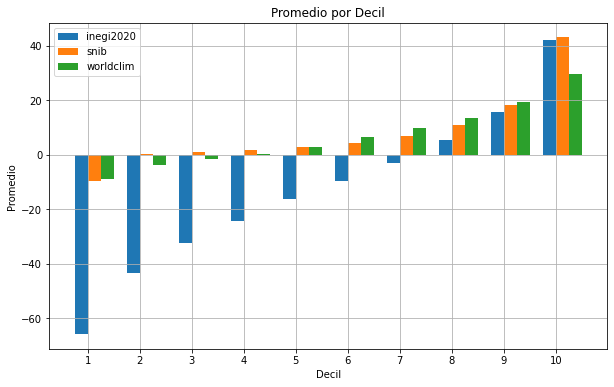

In [20]:
bar_width = 0.25
space_between_bars =1 # Espacio entre barras
space_between_labels = 1.5 
plt.figure(figsize=(10,6))
for i, (nombre_conjunto, conjunto) in enumerate(promedios.items()):
    deciles = [item['decil'] + i * (bar_width) for item in conjunto]
    promedios_ = [item['avg'] for item in conjunto]
    plt.bar(deciles, promedios_, label=nombre_conjunto, width=bar_width, align='edge')

plt.xticks(np.arange(1, 11) + bar_width * (len(promedios) - 1) / 2, range(1, 11))


plt.xlabel('Decil')
plt.ylabel('Promedio')
plt.title('Promedio por Decil')

plt.legend()
plt.grid(True)
plt.show()


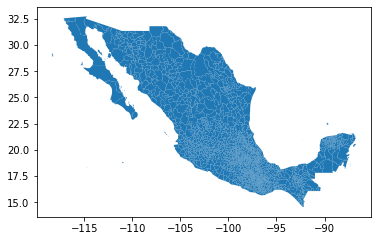

In [21]:
dr = os.path.join('muni_2016gw', 'muni_2016gw.shp')
mexico_shapefile = gpd.read_file(dr)
mexico_shapefile.plot()
plt.show()

In [22]:
#data_score[covariable]) tiene gridid tscore y decil
print(type(mexico_shapefile.head()))


<class 'geopandas.geodataframe.GeoDataFrame'>


In [23]:
mun_geometry=mexico_shapefile[["CVEGEO", "geometry"]]
print(mun_geometry)

     CVEGEO                                           geometry
0     01002  POLYGON ((-101.99941 22.21951, -101.99940 22.2...
1     01011  POLYGON ((-102.14088 22.07534, -102.14086 22.0...
2     01007  POLYGON ((-102.18902 22.36244, -102.18951 22.3...
3     01008  POLYGON ((-102.35385 22.12064, -102.35426 22.1...
4     01005  POLYGON ((-102.31034 22.03716, -102.30653 22.0...
...     ...                                                ...
2453  32020  POLYGON ((-102.89721 22.90452, -102.89587 22.9...
2454  32004  POLYGON ((-103.55467 21.57663, -103.55410 21.5...
2455  32057  POLYGON ((-102.24610 22.73451, -102.24615 22.7...
2456  32019  POLYGON ((-102.80528 21.67101, -102.80462 21.6...
2457  32058  POLYGON ((-103.19774 21.58534, -103.19599 21.5...

[2458 rows x 2 columns]


In [29]:
data_score_dataframes ={}
for key in data_score.keys():
    data_score_dataframes[key] = pd.DataFrame(data_score[key])
    data_score_dataframes[key] = pd.merge(mexico_shapefile, data_score_dataframes[key], left_on='CVEGEO', right_on='gridid', how='inner')
    data_score_dataframes[key] = gpd.GeoDataFrame(data_score_dataframes[key])


In [40]:
def pintar_mapa(merged_df):
    tscore_column = 'tscore'
    gdf = gpd.GeoDataFrame(merged_df)

    positive_data = gdf[gdf[tscore_column] >= 0]
    negative_data = gdf[gdf[tscore_column] < 0]

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    positive_data.plot(column=tscore_column, cmap='Reds', linewidth=0.1, ax=ax, edgecolor='0.8', legend=True)
    negative_data.plot(column=tscore_column, cmap='Blues', linewidth=0.1, ax=ax, edgecolor='0.8', legend=True)


    plt.title('Mapa de Calor Score')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    plt.show()


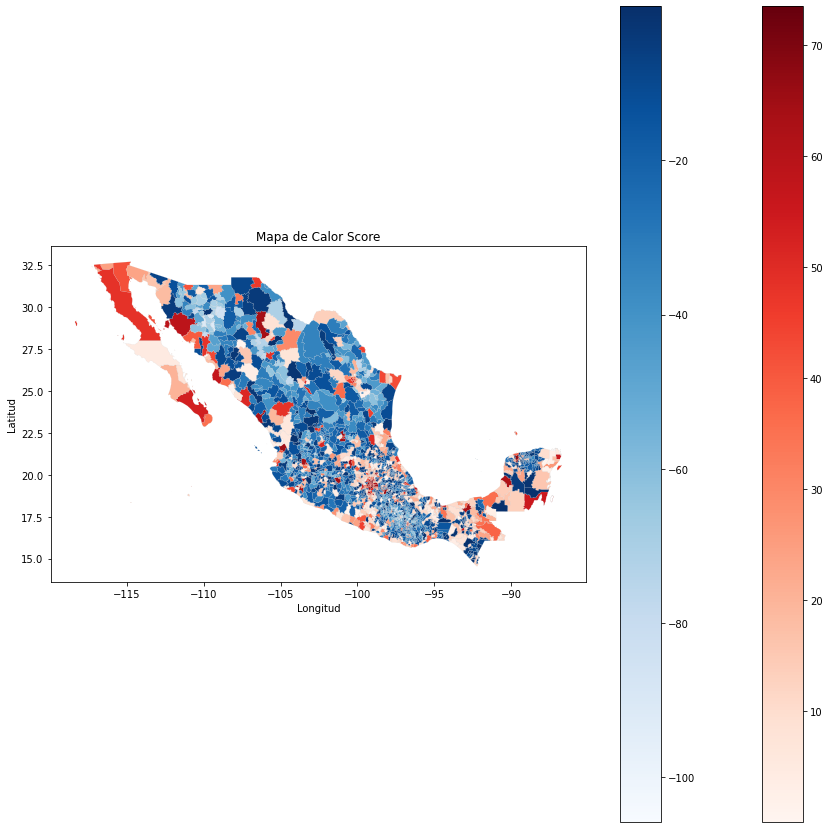

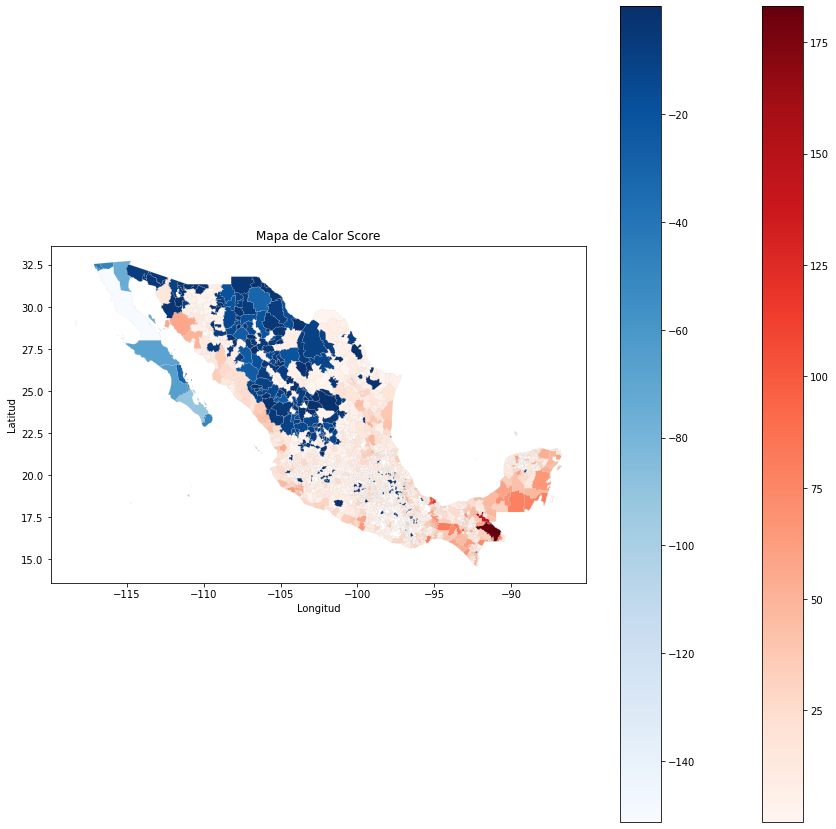

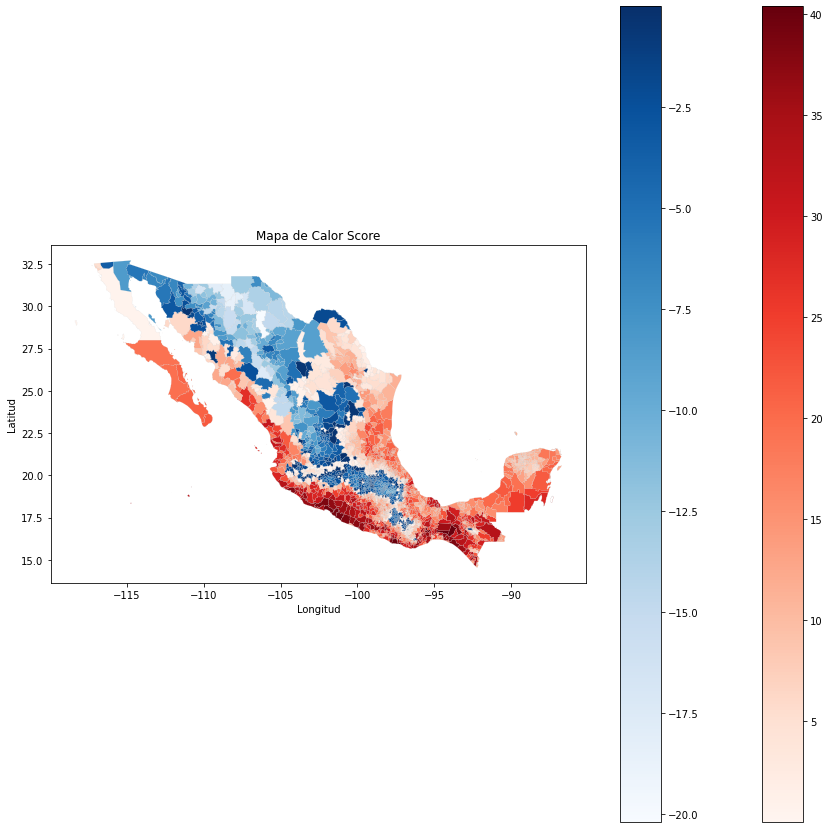

In [41]:
for key in data_score_dataframes.keys():    
    pintar_mapa(data_score_dataframes[key])

In [42]:
for key, gdf in data_score_dataframes.items():
    output_shapefile = f"{key}_mapa_shapefile.shp"

    gdf.to_file(output_shapefile, driver='ESRI Shapefile')

    print(f"GeoDataFrame '{key}' exportado exitosamente a '{output_shapefile}'")

GeoDataFrame 'inegi2020' exportado exitosamente a 'inegi2020_mapa_shapefile.shp'
GeoDataFrame 'snib' exportado exitosamente a 'snib_mapa_shapefile.shp'
GeoDataFrame 'worldclim' exportado exitosamente a 'worldclim_mapa_shapefile.shp'


In [47]:
for key in response.keys():
    print(key)
    
total_score_cell = response["data_score_cell"]
agregar_decil(total_score_cell)
promedio_total = calcular_promedio_por_decil(total_score_cell)



ok
data
data_score_cell
percentage_avg
id_analysis_worldclim


In [49]:
for element in promedio_total:
    print(element)


{'decil': 1, 'avg': -66.21618355219209}
{'decil': 2, 'avg': -40.96280615536574}
{'decil': 3, 'avg': -27.79707521242833}
{'decil': 4, 'avg': -17.10799324122678}
{'decil': 5, 'avg': -7.578862318085792}
{'decil': 6, 'avg': 2.0154240046054883}
{'decil': 7, 'avg': 12.274618547616633}
{'decil': 8, 'avg': 24.286079576694682}
{'decil': 9, 'avg': 42.07021457571802}
{'decil': 10, 'avg': 81.04430787093432}


In [53]:
total_score_dataframe = pd.DataFrame(total_score_cell)
total_score_dataframe = pd.merge(mexico_shapefile, total_score_dataframe, left_on='CVEGEO', right_on='gridid', how='inner')
total_score_dataframe = gpd.GeoDataFrame(total_score_dataframe)

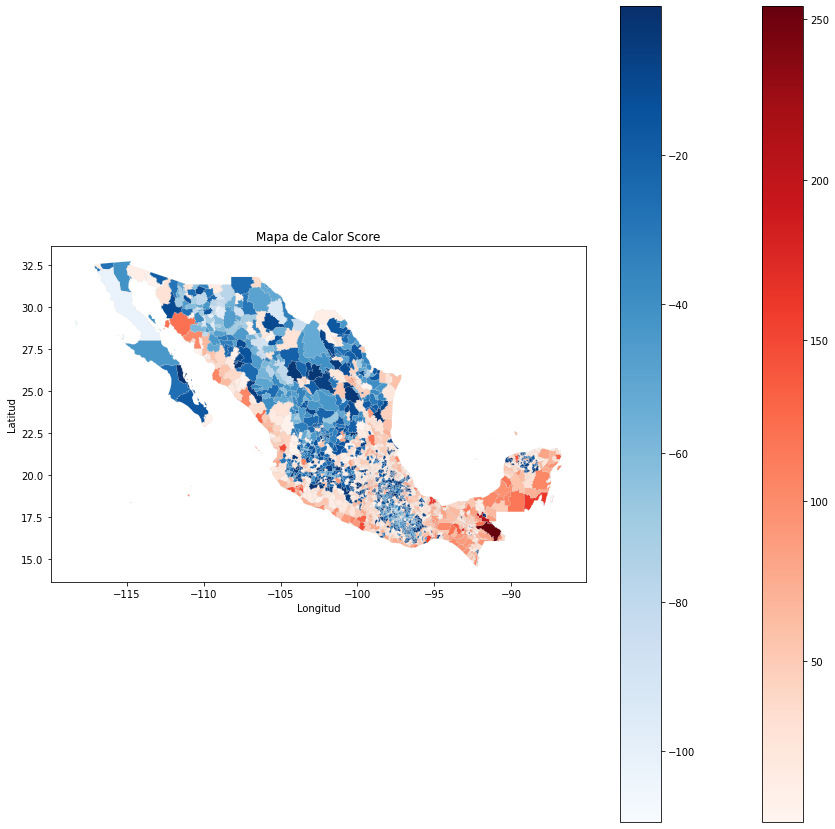

In [54]:
pintar_mapa(total_score_dataframe)